![](2022-12-15-14-05-51.png)



# HDSC Feburary '23 PREMIERE Project: Swiss Banknote Conterfeit Detection

## A Project by Team AWS

## Introduction
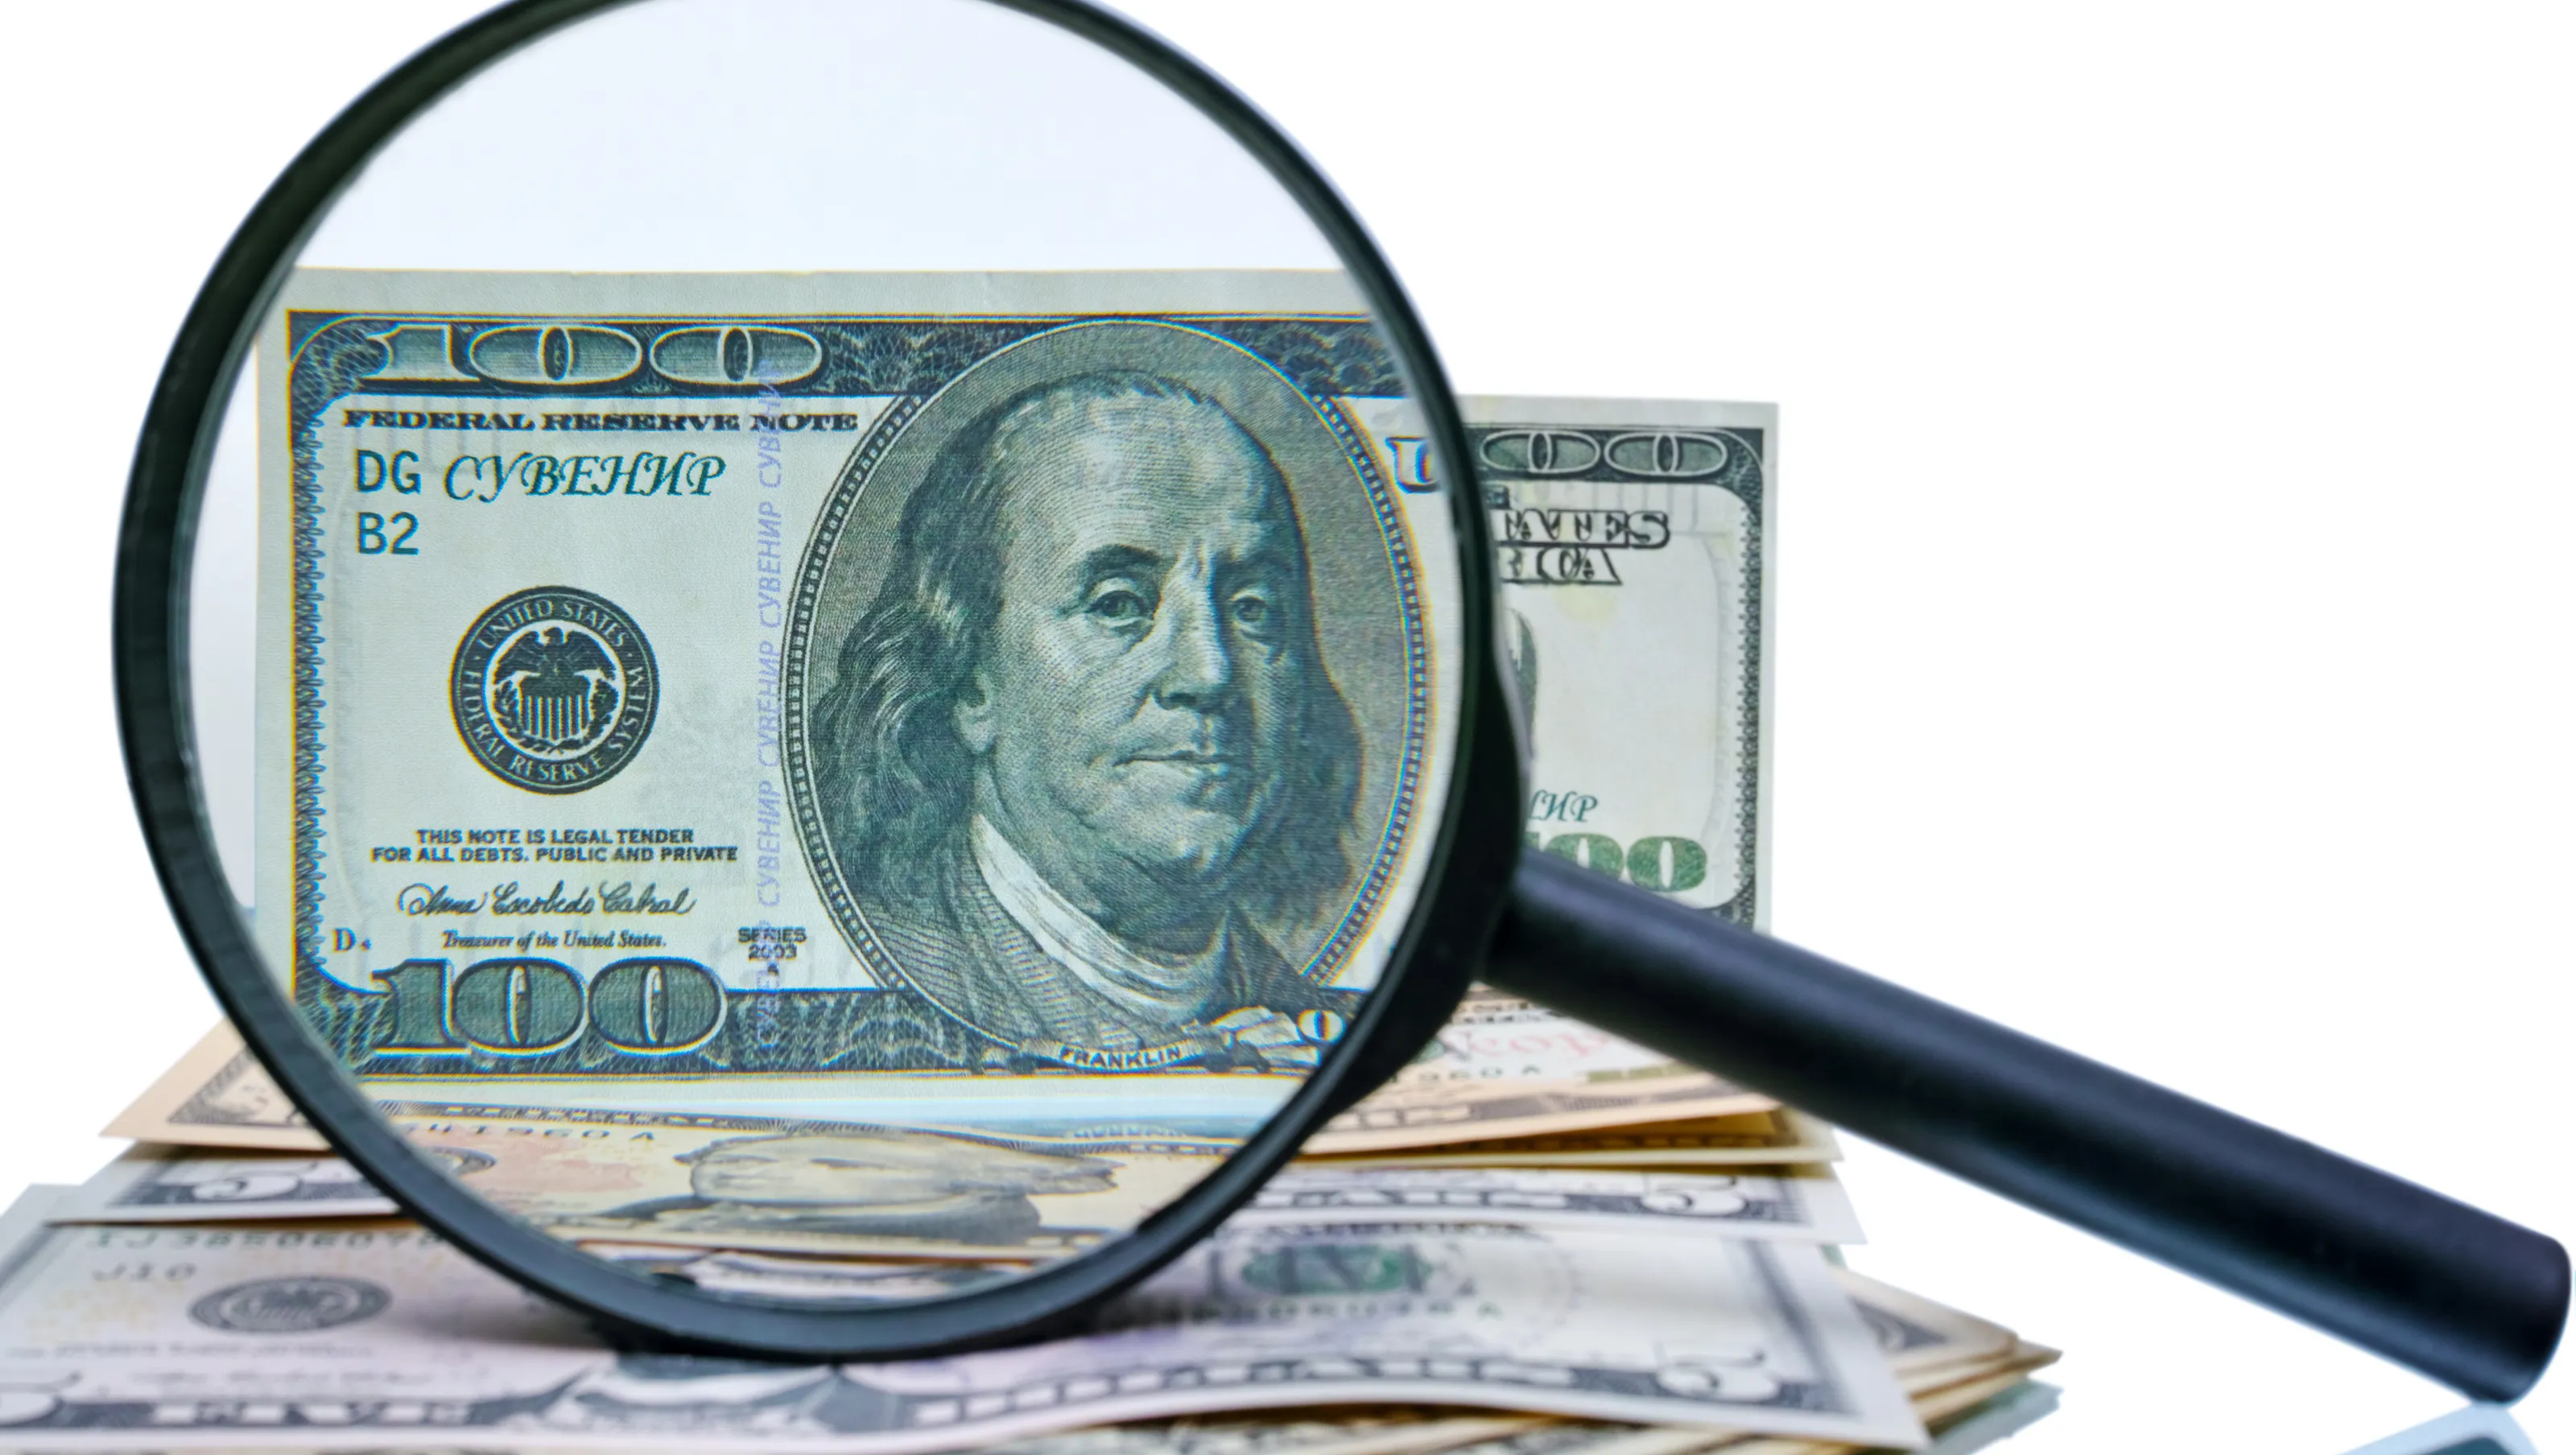

 - One of a nation's most valuable assets is its banknotes
 - To cause differences in the amount of money in the financial market, some criminals introduce fake notes that look like the actual notes
 - Humans find it challenging to distinguish between real and fake banknotes, in part because they have many characteristics
 - As fake notes are meticulously made, an effective algorithm that can predict whether a banknote is real or not is necessary

## Table of Content

1.<a href="#PLP"> Project Process</a></li>

2.<a href="#DC"> Data Collection</a>

3.<a href="#DEW"> Data EXploration & Wrangling</a>

4.<a href="#FE"> Feature Engineering</a>
- <a href="#feclen">Cleaning Feature</a>
- <a href="#felnk">Creating links to other data (Variables for creating features)</a>
- <a href="#fecre">Creating Feature</a>
- <a href="#fesel">Feature Selection</a>
- <a href="#undsamdata">Under sample data for model training</a>

5.<a href="#bldtrnmd"> Build and Train a Model</a>
- <a href="#mdscores">Model Test, Train and ROU-AUC Scores</a>
- <a href="#mdrecscor">Model Visualization of Recall Scores</a>
- <a href="#mdcnfmat">Model Confusion Matrices</a>
- <a href="#bmrocurv">Best Model ROC Curves</a>
- <a href="#clsrep">Classification Report of Best Models</a>

6.<a href="#HP1"> Hyper Parameter Tuning 1</a>
- <a href="#rndsecv"> Random Search with Cross Validation</a>

7.<a href="#EVPER"> Evaluate Performance of the Model</a>
- <a href="#bsper">Base Model Performance</a>
- <a href="#rndper">Performance of Best Random Search Model</a>

8.<a href="#HP2"> Hyper Parameter Tuning 2</a>
- <a href="#grdse">Grid Search with Cross Validation</a>
- <a href="#grdper1">Performance of Best Grid Search Model 1</a>

9.<a href="#HP3"> Hyper Parameter Tuning 3</a>
- <a href="#anogrdse">Another Grid Search</a>
- <a href="#grdper2">Performance of Best Grid Search Model 2</a>

10.<a href="#FM"> Final Model</a>
- <a href="#modpredin">Model Prediction and Insight</a>
- <a href="#errchar">Error Ratio by Character Features</a>

11.<a href="#SL"> Summary/Limitations</a>


## Aims and Objectives
Will you be able to identify genuine and conterfeit banknotes, even if half of the data is conterfeit? Perfect for testing different outlier detection algorithms

## Data Description 

 - We used near-perfect data for this problem sourced from Kaggle
 - The dataset is available at https://www.kaggle.com/datasets/chrizzles/swiss-banknote-conterfeit-detection
 - The cleaned data from the eXploratory data analysis (EDA) is used to design the machine learning model
 - The dataset includes information about the shape of the bill, as well as the label
 - It is made up of 200 banknotes in total, 100 for genuine/counterfeit each
 #### Attributes:
 - counterfeit: Whether a banknote is counterfeit (1) or genuine (0)
 - Length: Length of bill (mm)
 - Left: Width of left edge (mm)
 - Right: Width of right edge (mm)
 - Bottom: Bottom margin width (mm)
 - Top: Top margin width (mm)
 - Diagonal: Length of diagonal (mm)

<a id='PLP'></a>
## Project Flow Process
![](2022-12-15-16-15-01.png)

### Importing modules

In [1]:
# Data manipulation and wrangling package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML package
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier as XGBC

# Data processing package
import sklearn.utils 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, classification_report, mean_absolute_error

pd.set_option('display.max_columns', 50)

import warnings 
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objs as go
import plotly.graph_objects as gob
import plotly.offline as po
po.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<a id='DC'></a>
## Data Collection

### Loading Data

In [2]:
bnote = pd.read_csv('banknotes.csv')

### Data Preview

In [3]:
bnote.head()

conterfeit  Length   Left  Right  Bottom   Top  Diagonal
0           0   214.8  131.0  131.1     9.0   9.7     141.0
1           0   214.6  129.7  129.7     8.1   9.5     141.7
2           0   214.8  129.7  129.7     8.7   9.6     142.2
3           0   214.8  129.7  129.6     7.5  10.4     142.0
4           0   215.0  129.6  129.7    10.4   7.7     141.8


## Data Exploration & Wrangling

In [4]:
bnote.describe()

conterfeit      Length        Left       Right      Bottom         Top  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean     0.500000  214.896000  130.121500  129.956500    9.417500   10.650500   
std      0.501255    0.376554    0.361026    0.404072    1.444603    0.802947   
min      0.000000  213.800000  129.000000  129.000000    7.200000    7.700000   
25%      0.000000  214.600000  129.900000  129.700000    8.200000   10.100000   
50%      0.500000  214.900000  130.200000  130.000000    9.100000   10.600000   
75%      1.000000  215.100000  130.400000  130.225000   10.600000   11.200000   
max      1.000000  216.300000  131.000000  131.100000   12.700000   12.300000   

         Diagonal  
count  200.000000  
mean   140.483500  
std      1.152266  
min    137.800000  
25%    139.500000  
50%    140.450000  
75%    141.500000  
max    142.400000

In [5]:
bnote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


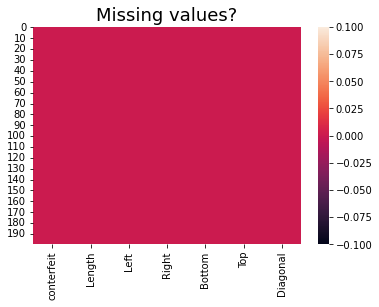

In [6]:
sns.heatmap(bnote.isnull())
plt.title("Missing values?", fontsize = 18)
plt.show()

* There is no missing value in the dataset

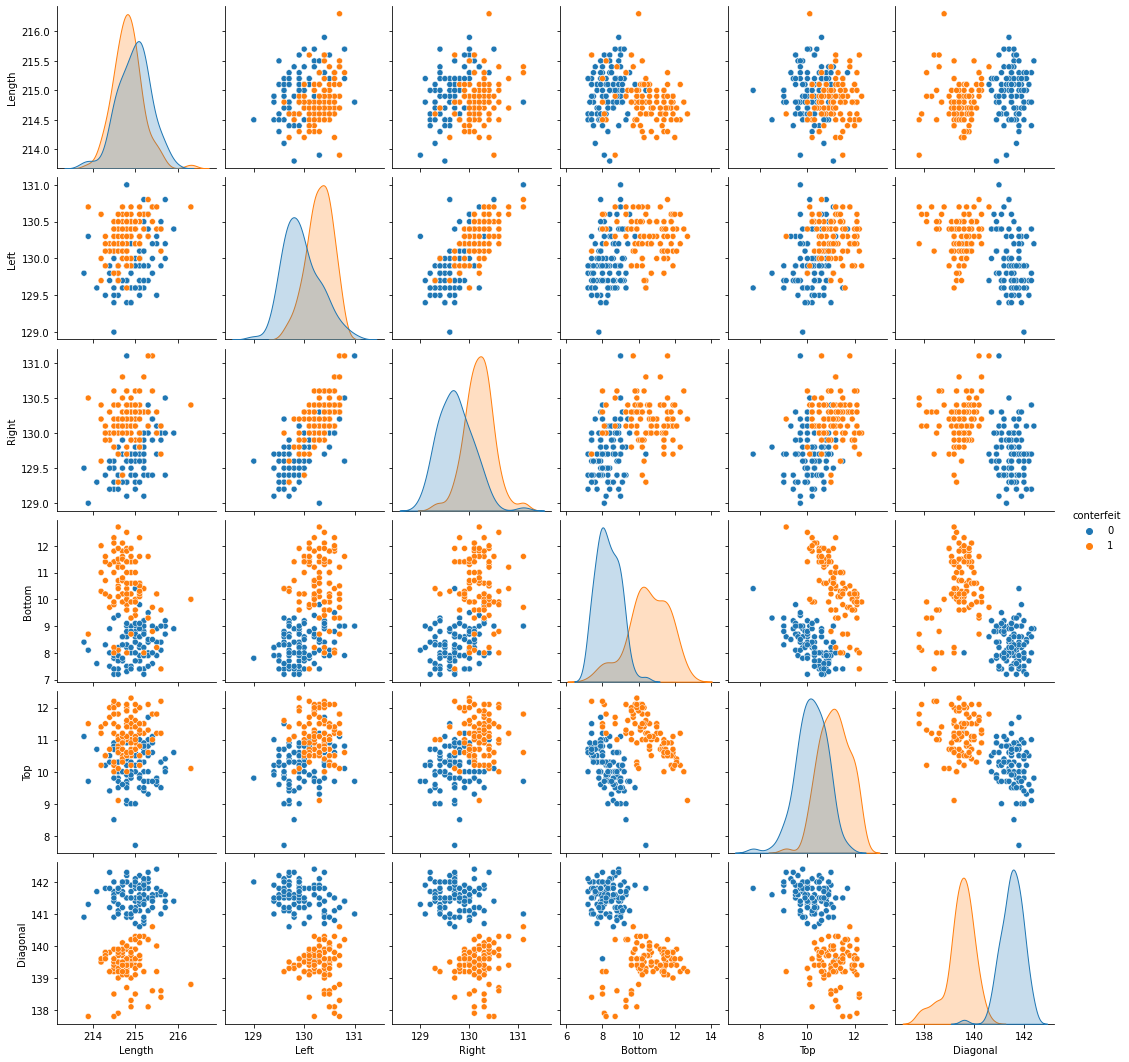

In [7]:
# Pairwise relationships depending on counterfeit
sns.pairplot(bnote, hue = "conterfeit")
plt.show()

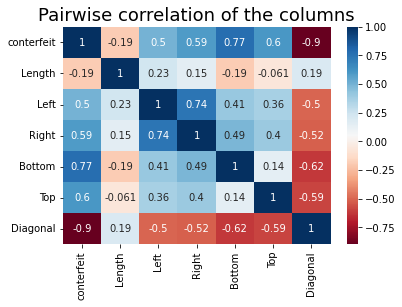

In [8]:
sns.heatmap(bnote.corr(), annot = True, cmap="RdBu")
plt.title("Pairwise correlation of the columns", fontsize = 18)
plt.show()

In [9]:
bnote["conterfeit"].value_counts().sum()

200

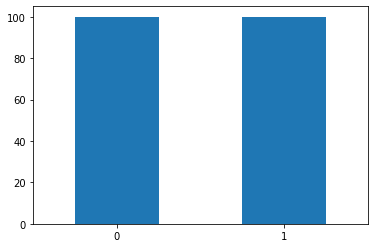

In [10]:
bnote["conterfeit"].value_counts().plot(kind="bar")
plt.xticks(rotation='horizontal')
plt.show()

The data is fairly balanced 

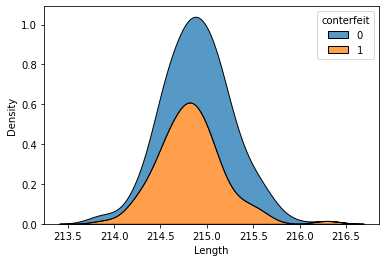

In [11]:
sns.kdeplot(data=bnote, x ='Length', hue='conterfeit', multiple='stack')
plt.show()

We have more of conterfeit compared to length

In [12]:
pd.crosstab(bnote.conterfeit, bnote.Length)

Length      213.8  213.9  214.1  214.2  214.3  214.4  214.5  214.6  214.7  \
conterfeit                                                                  
0               1      1      1      0      1      3      7      8      5   
1               0      1      0      3      4      3      9     10     11   

Length      214.8  214.9  215.0  215.1  215.2  215.3  215.4  215.5  215.6  \
conterfeit                                                                  
0              10      8     10     12     12      7      4      3      3   
1              15     13     10      9      2      3      2      2      2   

Length      215.7  215.9  216.3  
conterfeit                       
0               3      1      0  
1               0      0      1

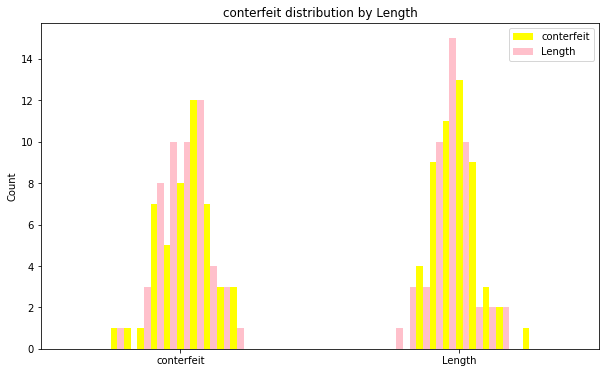

In [13]:
pd.crosstab(bnote.conterfeit, bnote.Length).plot(kind='bar', figsize=(10,6), color=["yellow", "pink"])

plt.title("conterfeit distribution by Length")
plt.xlabel("")
plt.xticks([0,1], ['conterfeit' , 'Length'], rotation='horizontal')
plt.ylabel("Count")
plt.legend(["conterfeit", "Length"])
plt.show()

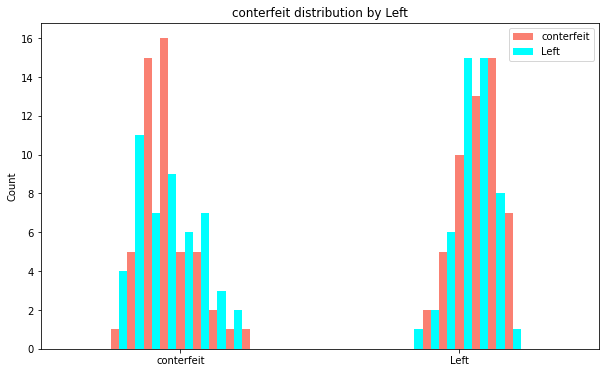

In [14]:
pd.crosstab(bnote.conterfeit, bnote.Left).plot(kind='bar', figsize=(10,6), color=["salmon", "cyan"])

plt.title("conterfeit distribution by Left")
plt.xlabel("")
plt.xticks([0,1], ['conterfeit' , 'Left'], rotation='horizontal')
plt.ylabel("Count")
plt.legend(["conterfeit", "Left"])
plt.show()

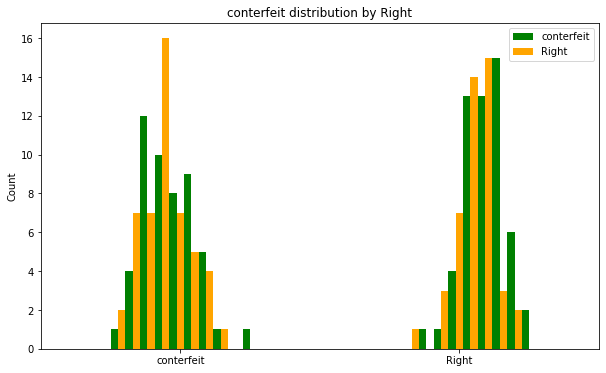

In [15]:
pd.crosstab(bnote.conterfeit, bnote.Right).plot(kind='bar', figsize=(10,6), color=["green", "orange"])

plt.title("conterfeit distribution by Right")
plt.xlabel("")
plt.xticks([0,1], ['conterfeit' , 'Right'], rotation='horizontal')
plt.ylabel("Count")
plt.legend(["conterfeit", "Right"])
plt.show()

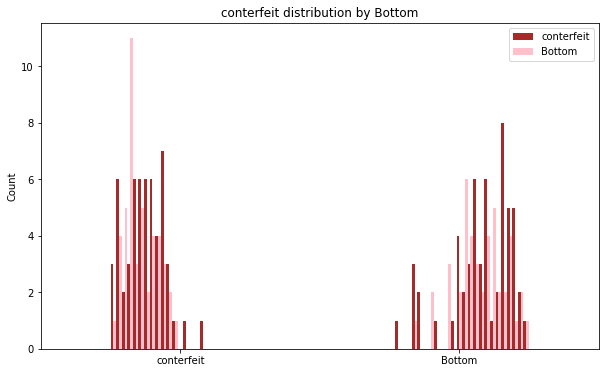

In [16]:
pd.crosstab(bnote.conterfeit, bnote.Bottom).plot(kind='bar', figsize=(10,6), color=["brown", "pink"])

plt.title("conterfeit distribution by Bottom")
plt.xlabel("")
plt.xticks([0,1], ['conterfeit' , 'Bottom'], rotation='horizontal')
plt.ylabel("Count")
plt.legend(["conterfeit", "Bottom"])
plt.show()

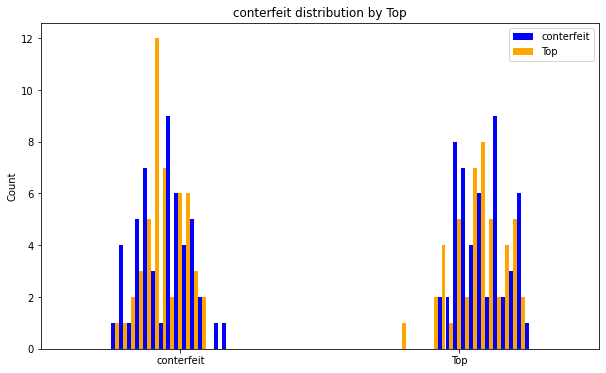

In [17]:
pd.crosstab(bnote.conterfeit, bnote.Top).plot(kind='bar', figsize=(10,6), color=["blue", "orange"])

plt.title("conterfeit distribution by Top")
plt.xlabel("")
plt.xticks([0,1], ['conterfeit' , 'Top'], rotation='horizontal')
plt.ylabel("Count")
plt.legend(["conterfeit", "Top"])
plt.show()

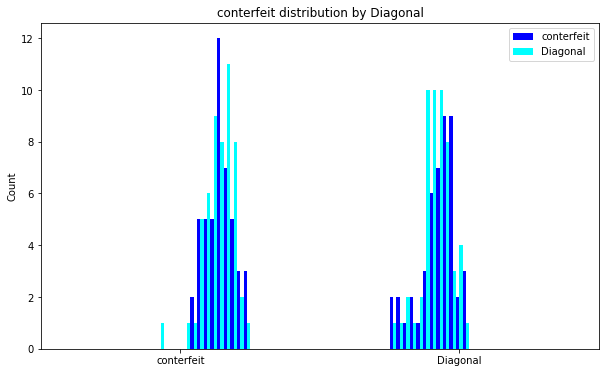

In [18]:
pd.crosstab(bnote.conterfeit, bnote.Diagonal).plot(kind='bar', figsize=(10,6), color=["blue", "cyan"])

plt.title("conterfeit distribution by Diagonal")
plt.xlabel("")
plt.xticks([0,1], ['conterfeit' , 'Diagonal'], rotation='horizontal')
plt.ylabel("Count")
plt.legend(["conterfeit", "Diagonal"])
plt.show()

<a id='FE'></a>
## Feature Engineering


<a id='feclen'></a>
### Cleaning Feature

#### Removing NaNs

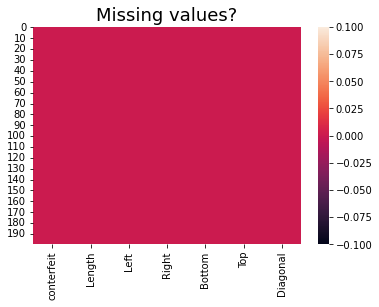

In [19]:
sns.heatmap(bnote.isnull())
plt.title("Missing values?", fontsize = 18)
plt.show()

As there is no missing values no need to remove NANs

<a id='fecre'></a>
### Creating Feature

In [20]:
bnote = bnote.copy()

In [21]:
pd.crosstab(bnote.Length, bnote.conterfeit)

conterfeit   0   1
Length            
213.8        1   0
213.9        1   1
214.1        1   0
214.2        0   3
214.3        1   4
214.4        3   3
214.5        7   9
214.6        8  10
214.7        5  11
214.8       10  15
214.9        8  13
215.0       10  10
215.1       12   9
215.2       12   2
215.3        7   3
215.4        4   2
215.5        3   2
215.6        3   2
215.7        3   0
215.9        1   0
216.3        0   1

<a id='fesel'></a>
### Feature Selection

In [22]:
new = bnote.copy()

#### Feature Correlation

In [23]:
# Checking correlation of numerical featres with the target variable.
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()['conterfeit'].abs().sort_values()
corr_mat

Length        0.194350
Left          0.495666
Right         0.586761
Top           0.602420
Bottom        0.772040
Diagonal      0.899179
conterfeit    1.000000
Name: conterfeit, dtype: float64

We can see that the correlation ranges from 0.19 t0 0.89

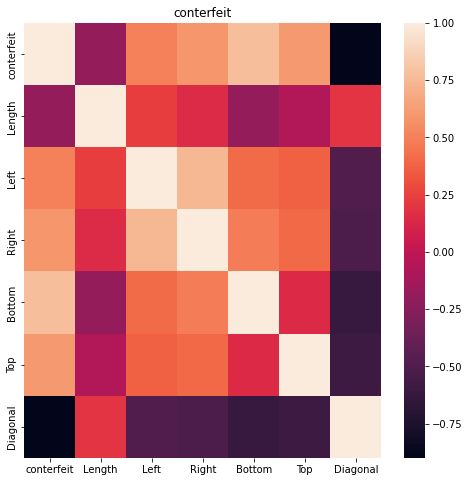

In [24]:
# Heatmap of numerical feature in the training dataset
plt.figure(figsize=(8, 8))
num_features = new.select_dtypes(['int', 'float'])
corr_mat = num_features.corr()
sns.heatmap(data=corr_mat)
plt.title('conterfeit')
plt.show()

#### Feature Multicollinearity

From the heatmap above, we can spot  multicollinearity (Multicollinearity refers to the statistical phenomenon where two or more independent variables are strongly correlated) amongst features. 

Let's view them using the Variance Inflation Factor (VIF)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = num_features.drop(columns='Length')
vif = pd.DataFrame()
vif['conterfeit'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif.sort_values(by='VIF', ascending=False)

conterfeit            VIF
2       Right  267883.377677
1        Left  234287.362123
5    Diagonal   56121.308832
4         Top     479.247318
3      Bottom     187.723172
0  conterfeit      23.388689

Let's drop some columns with multicolinearity. 

Then we will go with features that has a correlation greater than 0.1

#### Feature Dummies

#### Save cleaned data

<a id='undsamdata'></a>
### Under sample data for model training

<a id='bldtrnmd'></a>
## Build and Train a Model

In [26]:
bnote = bnote.reindex(np.random.permutation(bnote.index))

X = bnote.drop(columns = "conterfeit")
y = bnote["conterfeit"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train = st.fit_transform(X_train)

<a id='mdscores'></a>
### Models Test, Train and ROU-AUC Score

In [27]:
# creating a seed
fixed_seed = 42

# Models for training
models = [LogisticRegression(random_state=fixed_seed), KNeighborsClassifier(), RandomForestClassifier(random_state=fixed_seed),
          DecisionTreeClassifier(random_state=fixed_seed),  XGBC(seed=fixed_seed)]

test_score = []
train_score = []
roc_auc_lst = []

# Loops through each mosel and get their score
for model in models:
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    test = model.score(X_test, y_test)
    train = model.score(X_train, y_train)
    roc_auc = roc_auc_score(y_test, proba)
    test_score.append(test)
    train_score.append(train)
    roc_auc_lst.append(roc_auc)

In [28]:
models_score = {
    'Train Score': train_score,
    'Test_Score': test_score,
    "ROC_AUC Score": roc_auc_lst
}

pd.DataFrame(models_score, index=['LogisticRegression','KNeighborsClassifier', 'RandomForestClassifier', 
                              'DecisionTreeClassifier', 'XGBC'])

Train Score  Test_Score  ROC_AUC Score
LogisticRegression          0.99375        0.45            1.0
KNeighborsClassifier        0.98750        0.45            0.5
RandomForestClassifier      1.00000        0.45            0.5
DecisionTreeClassifier      1.00000        0.45            0.5
XGBC                        0.99375        0.45            0.5

We can see that some feature are performing well than the other, both on the training set and testing set. We will be working with the ROC-AUC score because this shows the ability of the model to distinguish between classes. The higher the score the better the model is 
Let's see the recall score for each of the model

<a id='mdrecscor'></a>
### Models Visualization of Recall Score  

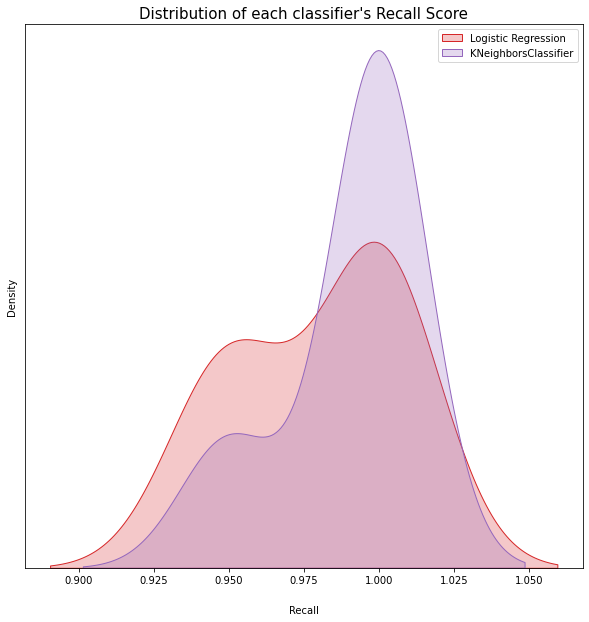

In [29]:
# Using stratified kfold to get the recall of each model
skf = StratifiedKFold(n_splits= 5 , shuffle= True , random_state= fixed_seed ) 
recall=[]
for model in models:
    result = cross_val_score(model, X, y, cv=skf, scoring="recall", n_jobs=-1)
    recall.append(result)
classifiers=['Logistic Regression', 'KNeighborsClassifier', 'RandomForest', 'DescisionTree', 'XGB']

plt.figure(figsize=(10, 10))
for X in range(len(recall)):
    sns.kdeplot(recall[X], shade=True)
    
plt.title("Distribution of each classifier's Recall Score", fontsize=15)
plt.legend(classifiers)
plt.xlabel("Recall", labelpad=20)
plt.yticks([])

plt.show()

From the above we can see the probabilty density of recall score for each model. Random forest classifier has a unimodal shape, and has the longest peak. 

XGBClassifier and Random forest classifier seems to have the highest recall score though low density compared to Logistic regression and Random forest classifier.

We will proceed with the models with higher AUC-ROC score, and check their confusion metrics

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

pred = model.predict(st.transform(X_test))

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results = []
results.append(("LogisticRegression",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[18  0]
 [ 0 22]]

Accuracy
 1.0


# Random Forrest

In [31]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred = rfc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("RandomForestClassifier",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[18  0]
 [ 0 22]]

Accuracy
 1.0


# Decision Tree

In [32]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

pred = dtc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("DecisionTreeClassifier",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.86      0.93        22

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.94      0.93      0.93        40

Confusion Matrix
 [[18  0]
 [ 3 19]]

Accuracy
 0.925


In [33]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(X_train, y_train)

pred = svc.predict(st.transform(X_test))

class_report = classification_report(y_test, pred)
conf_matrix = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results.append(("SVC",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix
 [[18  0]
 [ 0 22]]

Accuracy
 1.0


# Comparison of the models

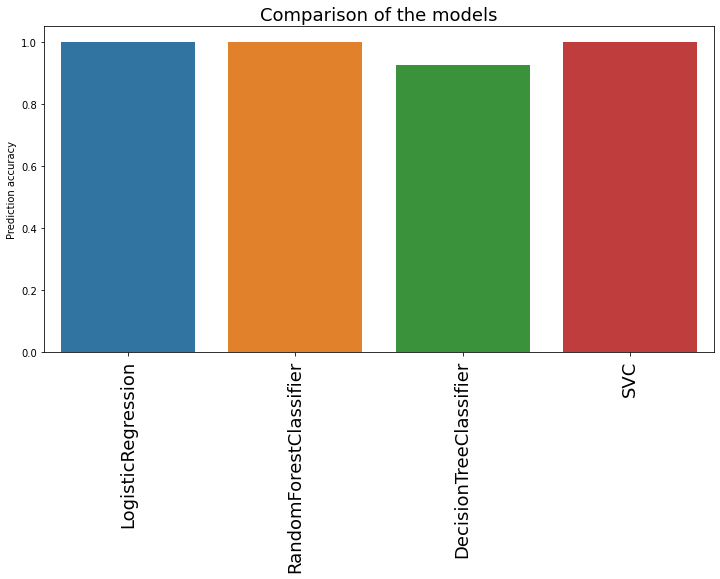

In [34]:
labels  = []
height = []
for i in range(len(results)):
    labels.append(results[i][0])
    height.append(results[i][-1])
    
plt.figure(figsize = (12,6))    
ax = sns.barplot(labels,height)
ax.set_xticklabels(labels, fontsize = 18, rotation = 90)
plt.title("Comparison of the models", fontsize = 18)
plt.ylabel("Prediction accuracy")
plt.show()

<a id='mdcnfmat'></a>
### Models Confusion Matrices

In [35]:
# Models with AUC-ROC score > 0.1
sub_models = [LogisticRegression(random_state=fixed_seed), KNeighborsClassifier(), RandomForestClassifier(random_state=fixed_seed), XGBC(seed=fixed_seed)]
# Getting the confusion metric for each model 
cm = []
for model in sub_models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_cm = confusion_matrix(y_test, pred)
    cm.append(model_cm)

In [36]:
# Function to plot heatmap
def cm_heatmap(cm, ax, r, c, model):
    title = str(sub_models[model]).split('(')[0]
    ax[r,c].set_title(f"{title} Confusion Matrix", fontsize=15.)
    fig = sns.heatmap(cm, square = True, xticklabels = ["conterfeit", "conterfeit"], annot = True, ax=ax[r,c],
                    annot_kws = {"fontsize": 13}, yticklabels = ["conterfeit", "conterfeit"],
                    cbar = True, cbar_kws = {"orientation": "vertical"}, cmap = "BrBG", fmt='d').set(
        xlabel = "Predicted Class", ylabel = "Actual Class",)
    return fig

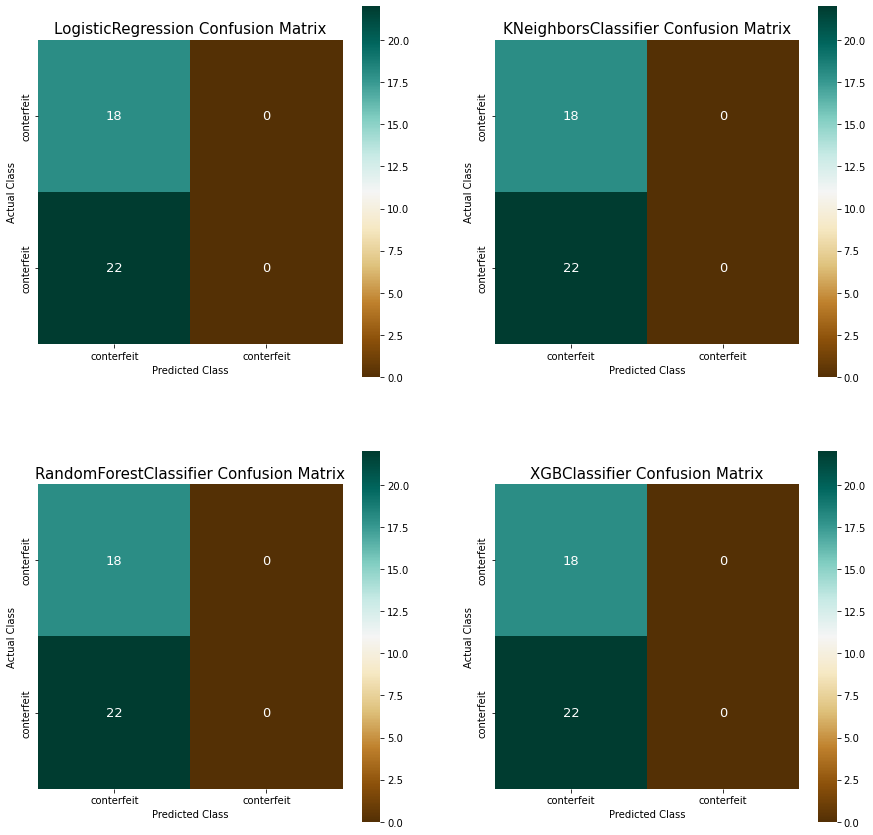

In [37]:
# Displaying confusion metrics
f, ax = plt.subplots(2, 2, figsize=(15, 15))
cm_heatmap(cm[0], ax, 0, 0, 0)
cm_heatmap(cm[1], ax, 0, 1, 1)
cm_heatmap(cm[2], ax, 1, 0, 2)
cm_heatmap(cm[3], ax, 1, 1, 3)
plt.show()

Above we can see the confusion matri for each models

<a id='bmrocurv'></a>
### Best Model ROC Curve

We have seen that Random Forest Classifier and XGBC are perfoming well with our data. We'll choose the two models and proceed.

Let's start by looking at the ROC curve of the two models

In [38]:
# Two best model based on AUC-ROC score and confusion matriX observation.
best_model = [RandomForestClassifier(random_state=fixed_seed), XGBC(seed=fixed_seed)]
# ROC curve for each model
roc = []
for model in best_model:
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    roc_cur = roc_curve(y_test, proba)
    roc.append(roc_cur)

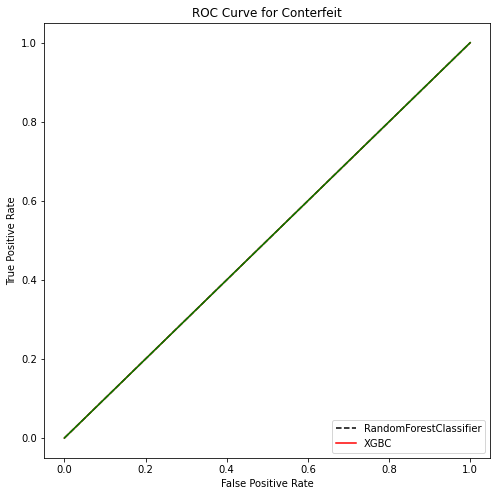

In [39]:
# Plotting ROC curve for the models
fig = plt.figure(figsize=(8, 8))
fpr1, tpr1, thresholds1 = roc[0]
fpr2, tpr2, thresholds2 = roc[1]

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr1, tpr1, color='r')
plt.plot(fpr2, tpr2, color='g')
plt.legend(['RandomForestClassifier', 'XGBC'], loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Conterfeit')
plt.show()

<a id='clsrep'></a>
### Classification Report of Best Models

In [40]:
for model in best_model:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(str(model).split('(')[0] +' Test Performance')
    cls_rep = classification_report(y_test, pred, target_names=['conterfeit', 'Length'])
    print(cls_rep)
    print('='*40)

RandomForestClassifier Test Performance
              precision    recall  f1-score   support

  conterfeit       0.45      1.00      0.62        18
      Length       0.00      0.00      0.00        22

    accuracy                           0.45        40
   macro avg       0.23      0.50      0.31        40
weighted avg       0.20      0.45      0.28        40

XGBClassifier Test Performance
              precision    recall  f1-score   support

  conterfeit       0.45      1.00      0.62        18
      Length       0.00      0.00      0.00        22

    accuracy                           0.45        40
   macro avg       0.23      0.50      0.31        40
weighted avg       0.20      0.45      0.28        40



From the test performance above, we can see that both models share lots of similarity, such as having the same accuracy, same f1 score for dead category, same macro avg, and weighted avg.

Comparing the precision and recall score the maXimum difference they have is 2. 

we will proceed to tuning Random Forest Classifier for better performance. 

<a id='HP1'></a>
## Hyper Parameter Tuning 1

We are going to tune Random Forest Classifier model to get it's best performance. Some ranges of parameters will be giving, then a random search will be done on those parameters for the best.

<a id='rndsecv'></a>
### Random Search with Cross Validation

In [41]:
random_grid = {'bootstrap': [True, False],
                'max_depth': [20, 40, 60, 80,],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'criterion': ["gini", "entropy"],
                'n_estimators': [200, 400, 600, 800,],
                }

In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier(random_state=fixed_seed)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                                random_state=fixed_seed, n_jobs = -1, scoring='neg_mean_absolute_error')
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 40, 60, 80],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [43]:
# Best Parameters from random search
rfc_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 60,
 'criterion': 'gini',
 'bootstrap': True}

<a id='EVPER'></a>
## Evaluate Performance of the Model

In [44]:
# Function to calculate model average error and accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    print('Model Performance')
    print('='*30)
    avg_error = 'Average Error: {:0.4f} degrees.'.format(np.mean(errors))
    print(avg_error)
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: {:0.2f}%.'.format(100 * accuracy))
    
    return [np.mean(errors), accuracy]

# Function to show model performance difference
def improvement(new_score, base):
    print('Improvement Error: {:0.2f}%.'.format( 100 * (new_score[0] - base[0]) / base[0]))
    print('Improvement Accuracy: {:0.2f}%.'.format( 100 * (new_score[1] - base[1]) / base[1]))
    print('=' * 30)


<a id='bsper'></a>
#### Base Model Performance

In [45]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = fixed_seed)
base_model.fit(X_train, y_train)
base_performance = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.5500 degrees.
Accuracy: 45.00%.


<a id='rndper'></a>
#### Performance of Best Random Search Model

In [46]:
best_random = rfc_random.best_estimator_
random_performance = evaluate(best_random, X_test, y_test)
improvement(random_performance, base_performance)

Model Performance
Average Error: 0.5500 degrees.
Accuracy: 45.00%.
Improvement Error: 0.00%.
Improvement Accuracy: 0.00%.


<a id='HP2'></a>
## Hyper Parameter Tuning 2
Now let's do a grid search around the best parameter gotten from the random search

<a id='grdse'></a>
### Grid Search with Cross Validation

In [47]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [50, 60],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [200, 400, 600],
    'criterion': ["gini"]
}
# Create a based model
rfc = RandomForestClassifier(random_state=fixed_seed)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, 
                           n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [50, 60], 'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 400, 600]},
             scoring='neg_mean_absolute_error', verbose=2)

In [48]:
# Best parameter from grid search 
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

<a id='grdper1'></a>
#### Performance of Best Grid Search Model 1

In [49]:
best_grid = grid_search.best_estimator_
grid_performance = evaluate(best_grid, X_test, y_test)
improvement(grid_performance, base_performance)

Model Performance
Average Error: 0.5500 degrees.
Accuracy: 45.00%.
Improvement Error: 0.00%.
Improvement Accuracy: 0.00%.


It seems we have about maXed out performance given the fact that ther is no improvement on error and acccuracy, but we can give it one more try with a grid further refined from our previous results.

<a id='HP3'></a>
## Hyper Parameter Tuning 3

<a id='anogrdse'></a>
#### Another Grid Search

In [50]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [40, 50,],
    'max_features': ['auto'],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [2, 3],
    'n_estimators': [100, 200, 300],
    'criterion': ["gini"]
}
# Create a based model
rfc = RandomForestClassifier(random_state=fixed_seed)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, 
                           n_jobs = -1, verbose = 2, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [40, 50], 'max_features': ['auto'],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=2)

In [51]:
# Best performance from second grid search
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

<a id='grdper2'></a>
#### Performance of Best Grid Search Model 2

In [52]:
best_grid = grid_search.best_estimator_
grid_performance2 = evaluate(best_grid, X_test, y_test)
improvement(grid_performance2, base_performance)

Model Performance
Average Error: 0.5500 degrees.
Accuracy: 45.00%.
Improvement Error: 0.00%.
Improvement Accuracy: 0.00%.


A big decrease in performance, yet the same best parameters was given. This indicates we have reached diminishing returns for hyperparameter tuning. We could continue, but the returns would be the same output in terms of parameters.

<a id='FM'></a>
## Final Model 

In [53]:
final_model = grid_search.best_estimator_
print('Final Model Parameter:')
print('='*30)
print(final_model.get_params())
print('='*30)
grid_final_accuracy = evaluate(final_model, X_test, y_test)

Final Model Parameter:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 40, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Model Performance
Average Error: 0.5500 degrees.
Accuracy: 45.00%.



## Summary
By using the results above, we summarised the data and demonstrated some easy methods of analysis:
1. Simply employing diagonal variables has produced excellent classification results.
2. Top and Bottom are two excellent variables to include in the predict model in order to categorise counterfeit banknotes.

### Limitations